In [4]:
# Libraries Import Karna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings set karte hain taaki saare columns dikhein
pd.set_option('display.max_columns', None)

# Data Load Karna
# File is in the same folder as the notebook
try:
    data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: CSV file nahi mila. Please check the file name and path.")

Data loaded successfully!


In [5]:
# Missing values bahut kam hain (11 out of 7043). 
# isliye, hum in rows ko data se hata denge (drop kar denge)
print("Dropping rows with missing TotalCharges...")
data.dropna(subset=['TotalCharges'], inplace=True)

# check karte hain ki ab kitni rows bachi hain
print("Missing values hatane ke baad naya data shape:", data.shape)

Dropping rows with missing TotalCharges...
Missing values hatane ke baad naya data shape: (7043, 21)


In [6]:
# Dekhte hain ki hamare target variable (Churn) ka distribution kaisa hai
print("\n--- Churn Count (Kitne Customers Chhod Gaye) ---")
print(data['Churn'].value_counts())

# Isko percentage mein dekhte hain, taaki pata chale ki kitne % log chhod kar gaye
print("\n--- Churn Percentage ---")
print(data['Churn'].value_counts(normalize=True) * 100)


--- Churn Count (Kitne Customers Chhod Gaye) ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64

--- Churn Percentage ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


C:\Users\Ariba\AppData\Local\Temp\ipykernel_7708\4201724669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='rocket')


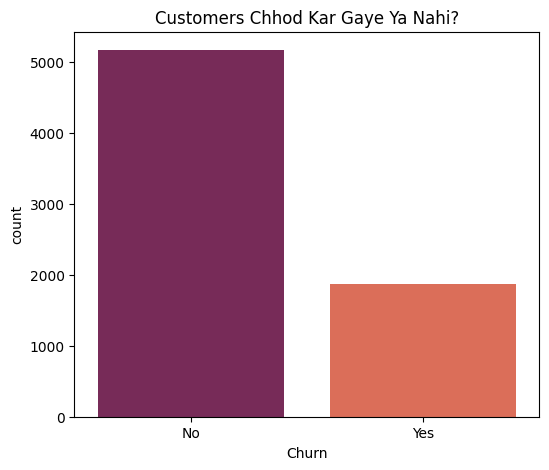

In [7]:
# Churn ka distribution graph se dekhte hain, Countplot use karke
plt.figure(figsize=(6, 5))
# rocket palette thoda achha dikhta hai. 'Churn' hamara target hai, usko x-axis pe rakho.
sns.countplot(x='Churn', data=data, palette='rocket') 
plt.title('Customers Chhod Kar Gaye Ya Nahi?') # Title bhi dal dete hain
plt.show()

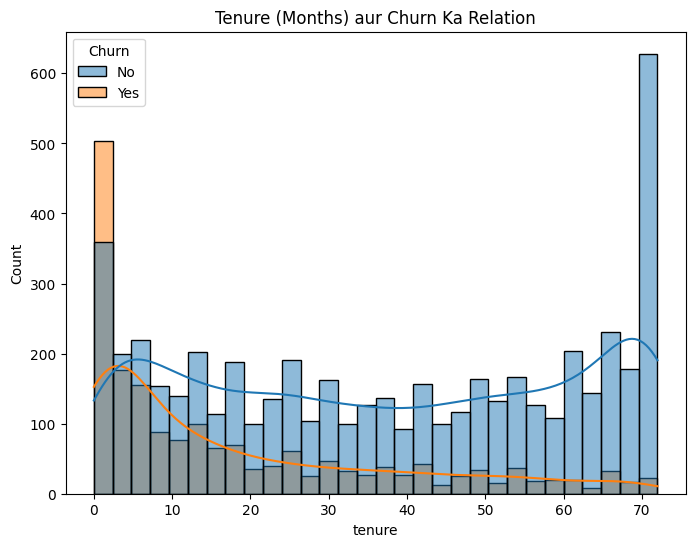

In [8]:
# Dekhte hain ki jo log jaldi chhod jate hain (Yes), unka Tenure kitna hota hai
plt.figure(figsize=(8, 6))
# Histogram banao Tenure ke liye, aur hue='Churn' se Yes/No ko alag colour do
sns.histplot(data=data, x='tenure', hue='Churn', kde=True, bins=30) 
plt.title('Tenure (Months) aur Churn Ka Relation')
plt.show()

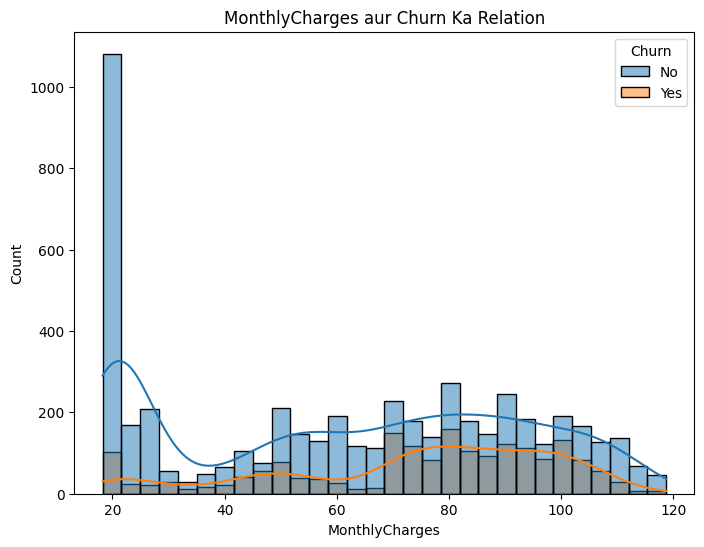

In [9]:
# Dekhte hain ki kya high bill dene wale customers zyada chhodte hain?
plt.figure(figsize=(8, 6))
# MonthlyCharges ka distribution dekho, Churn ke hisaab se
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, bins=30) 
plt.title('MonthlyCharges aur Churn Ka Relation')
plt.show()

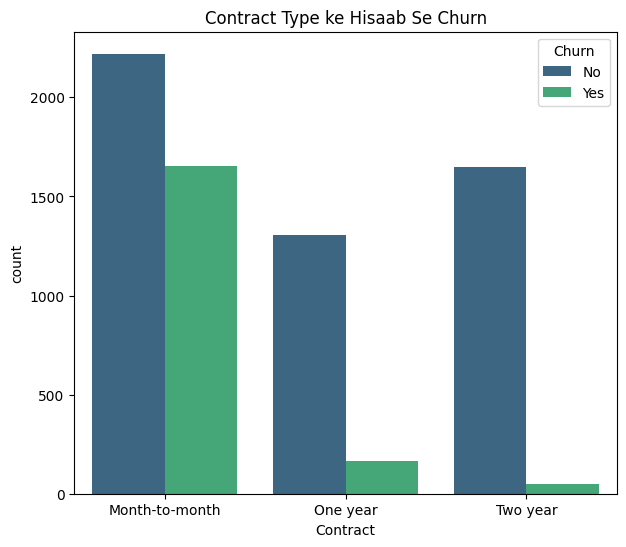

In [10]:
# Dekhte hain ki alag-alag contract type mein churn rate kya hai
plt.figure(figsize=(7, 6))
# 'hue' se Yes/No ko alag rakho, aur 'Contract' ko x-axis par
sns.countplot(data=data, x='Contract', hue='Churn', palette='viridis') 
plt.title('Contract Type ke Hisaab Se Churn')
plt.show()

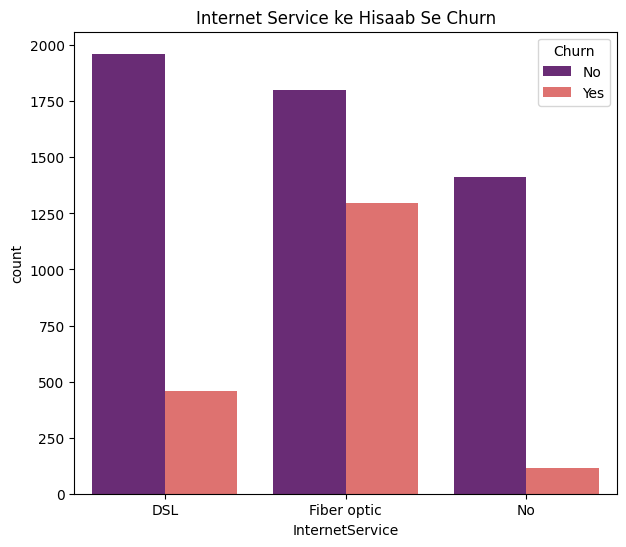

In [11]:
# Dekhte hain ki kis Internet Service mein zyada log chhodte hain
plt.figure(figsize=(7, 6))
sns.countplot(data=data, x='InternetService', hue='Churn', palette='magma') 
plt.title('Internet Service ke Hisaab Se Churn')
plt.show()

In [12]:
# 'Yes'/'No' columns ko 1 aur 0 mein badalna (Model ke liye)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 
               'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
               'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'PaperlessBilling', 'Churn']

# 'No internet service' aur 'No phone service' ko bhi 'No' mein badalte hain, taaki binary ho jaye.
for col in binary_cols:
    data[col].replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)

# ab saare 'Yes' ko 1 aur 'No' ko 0 mein badal do.
for col in binary_cols:
    data[col].replace({'Yes': 1, 'No': 0}, inplace=True)
    
print("Binary columns successfully converted to 0s and 1s.")
print("Updated Churn Counts:")
print(data['Churn'].value_counts())

Binary columns successfully converted to 0s and 1s.
Updated Churn Counts:
Churn
0    5174
1    1869
Name: count, dtype: int64


C:\Users\Ariba\AppData\Local\Temp\ipykernel_7708\3652829853.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)
C:\Users\Ariba\AppData\Local\Temp\ipykernel_7708\3652829853.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [13]:
# Gender column ko bhi 0 aur 1 mein badalte hain (Female=0, Male=1)
data['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
print("Gender column converted to 0 and 1.")

Gender column converted to 0 and 1.


C:\Users\Ariba\AppData\Local\Temp\ipykernel_7708\2436199125.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
C:\Users\Ariba\AppData\Local\Temp\ipykernel_7708\2436199125.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'

In [14]:
# Jo columns 2 se zyada categories rakhte hain, unhe One-Hot Encode karte hain
# Yeh pandas ka sabse aasan tareeka hai: pd.get_dummies()
data = pd.get_dummies(data, columns=['Contract', 'InternetService', 'PaymentMethod'])
print("Multi-category columns successfully One-Hot Encoded.")
print("Data ka final shape ab dekho:", data.shape)
print("Pehle 5 rows dekho, sab numbers mein aa gaya hoga:")
print(data.head())

Multi-category columns successfully One-Hot Encoded.
Data ka final shape ab dekho: (7043, 28)
Pehle 5 rows dekho, sab numbers mein aa gaya hoga:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
0             0              0               0             1   
1             1              0               1             0   
2             1              0               1             1   
3             0              0               1             0   
4             1              0               0             0   

   DeviceProtection  TechSupport  StreamingTV  Streamin

In [16]:
# Libraries for Model Building
from sklearn.model_selection import train_test_split

# X = Features (Saare columns, Churn ko chhod kar)
X = data.drop('Churn', axis=1)

# y = Target Variable (Sirf Churn column)
y = data['Churn']

print("X aur y data successfully alag ho gaya.")
print("X shape (Features):", X.shape)
print("y shape (Target):", y.shape)

X aur y data successfully alag ho gaya.
X shape (Features): (7043, 27)
y shape (Target): (7043,)


In [17]:
# 80% data training ke liye aur 20% testing ke liye
# random_state=42 se har baar same split milega
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData successfully split ho gaya:")
print("X_train (Training Features):", X_train.shape)
print("X_test (Testing Features):", X_test.shape)


Data successfully split ho gaya:
X_train (Training Features): (5634, 27)
X_test (Testing Features): (1409, 27)


In [19]:
# customerID column ko ab finaly X se hata denge, jisse woh model mein na jaaye.
# X = Features (Saare columns, Churn, aur customerID ko chhod kar)

# Check karo ki X mein 'customerID' hai ya nahi, aur agar hai toh drop kar do.
if 'customerID' in data.columns:
    X = data.drop(['Churn', 'customerID'], axis=1) 
else:
    # Agar customerID pehle hi hata diya hai, toh theek hai.
    X = data.drop('Churn', axis=1)

# y = Target Variable (Sirf Churn column)
y = data['Churn']

print("X aur y data successfully dobara alag ho gaya.")
print("X shape (Features):", X.shape)
print("y shape (Target):", y.shape)

X aur y data successfully dobara alag ho gaya.
X shape (Features): (7043, 26)
y shape (Target): (7043,)


In [20]:
# 80% data training ke liye aur 20% testing ke liye
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData successfully split ho gaya:")
print("X_train (Training Features):", X_train.shape)
print("X_test (Testing Features):", X_test.shape)


Data successfully split ho gaya:
X_train (Training Features): (5634, 26)
X_test (Testing Features): (1409, 26)


In [23]:
# Check karte hain ki X data mein koi non-numeric (object) column toh nahi reh gaya
print("--- Final X Data Info Check ---")
X.info()

--- Final X Data Info Check ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport     

In [24]:
# Agar X.info() mein koi object type column dikhta hai, use hatao.
# Agar saare non-numeric columns hat gaye hain, toh yeh code skip ho jayega.
X_cols_to_drop = X.select_dtypes(include=['object']).columns
if len(X_cols_to_drop) > 0:
    print(f"Dropping remaining non-numeric columns: {X_cols_to_drop.tolist()}")
    X.drop(X_cols_to_drop, axis=1, inplace=True)
else:
    print("X mein koi object column nahi mila. Yeh theek hai.")

Dropping remaining non-numeric columns: ['TotalCharges']


In [25]:
# Yeh code X mein se saare object (string) columns ko drop kar dega.
# Agar TotalCharges mein chhupi hui string hogi toh woh bhi theek ho jayegi.
X = X.select_dtypes(exclude=['object'])

print("X mein ab sirf numerical columns bache hain. X ka naya shape:", X.shape)

X mein ab sirf numerical columns bache hain. X ka naya shape: (7043, 25)


In [26]:
# 80% data training ke liye aur 20% testing ke liye
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split ho gaya.")
print("X_train (Training Features):", X_train.shape)

Data successfully split ho gaya.
X_train (Training Features): (5634, 25)


In [27]:
# Logistic Regression model import karte hain
from sklearn.linear_model import LogisticRegression

# Model banao aur training data (X_train, y_train) se train karo
model = LogisticRegression(max_iter=5000, random_state=42) 
model.fit(X_train, y_train)

print("Logistic Regression Model successfully train ho gaya.")

Logistic Regression Model successfully train ho gaya.


In [28]:
# Test data (jo model ne abhi tak nahi dekha) par prediction karte hain
y_pred = model.predict(X_test)

print("Prediction successfully ho gaya.")

Prediction successfully ho gaya.


In [29]:
# Model ki Accuracy check karte hain aur Report dekhte hain
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Classification Report (Detail mein performance)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Model Accuracy: 82.04 %

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [31]:
# Model Improvement ke liye, hum ek alag Model (Random Forest) try karte hain
from sklearn.ensemble import RandomForestClassifier

# Naya model banao
rf_model = RandomForestClassifier(random_state=42)

# Training data (X_train, y_train) se train karo
rf_model.fit(X_train, y_train)

# Prediction karo
rf_y_pred = rf_model.predict(X_test)

# Report dekho
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Model Accuracy:", round(rf_accuracy * 100, 2), "%")

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_y_pred))

Random Forest Model Accuracy: 78.78 %

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



In [32]:
# Model Improvement ke liye, hum ek alag Model (Random Forest) try karte hain
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Naya model banao (Random Forest Decision Trees par based hai)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators matlab 100 trees use karo
rf_model.fit(X_train, y_train)

# Prediction karo
rf_y_pred = rf_model.predict(X_test)

# Report dekho
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Model Accuracy:", round(rf_accuracy * 100, 2), "%")

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, rf_y_pred))

Random Forest Model Accuracy: 78.78 %

--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



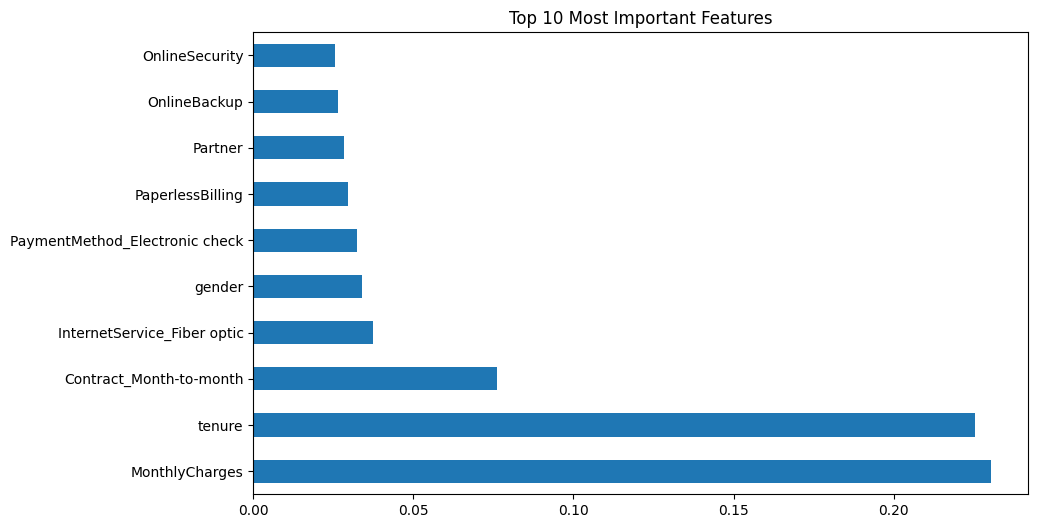


Top 5 Most Important Features:
MonthlyCharges                 0.230501
tenure                         0.225452
Contract_Month-to-month        0.076105
InternetService_Fiber optic    0.037349
gender                         0.034064
dtype: float64


In [33]:
# Random Forest se pata lagate hain ki kaunsa feature sabse zaroori tha
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

plt.figure(figsize=(10, 6))
# Top 10 sabse zaroori features dikhao
feature_importances.nlargest(10).plot(kind='barh') 
plt.title('Top 10 Most Important Features')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importances.nlargest(5))